In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Analysis

In [2]:
# reading dataset
data = pd.read_csv('./Dataset/train.csv')
data.shape

(8523, 12)

In [3]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:

data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [5]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
data.drop(['Item_Weight','Outlet_Size'], axis=1, inplace=True)

In [7]:
data

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


In [8]:
data[['Item_Fat_Content','Item_Outlet_Sales']].groupby(['Item_Fat_Content']).mean()

,Item_Outlet_Sales
Item_Fat_Content,
Low Fat,2157.711534
Regular,2224.561170


In [9]:
# Item identifier doesnt affect sales so we are dropping it
data.drop(['Item_Identifier'], axis=1, inplace=True)

In [10]:
data

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


In [11]:
print(data[['Item_MRP','Item_Outlet_Sales']].groupby(['Item_MRP']).mean())
print(data[['Outlet_Establishment_Year','Item_Outlet_Sales']].groupby(['Outlet_Establishment_Year']).mean())
print(data[['Outlet_Identifier','Item_Outlet_Sales']].groupby(['Outlet_Identifier']).mean())
print(data[['Outlet_Type','Item_Outlet_Sales']].groupby(['Outlet_Type']).mean())

          Item_Outlet_Sales
Item_MRP                   
31.2900            898.8300
31.4900            466.0600
31.8900            366.1900
31.9558            679.1160
32.0558           1018.6740
...                     ...
266.1884          4239.8144
266.2884          2914.8724
266.5884          3974.8260
266.6884          2119.9072
266.8884          3047.3666

[5938 rows x 1 columns]
                           Item_Outlet_Sales
Outlet_Establishment_Year                   
1985                             2483.677474
1987                             2298.995256
1997                             2277.844267
1998                              339.351662
1999                             2348.354635
2002                             2192.384798
2004                             2438.841866
2007                             2340.675263
2009                             1995.498739
                   Item_Outlet_Sales
Outlet_Identifier                   
OUT010                    339.351662
OUT01

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

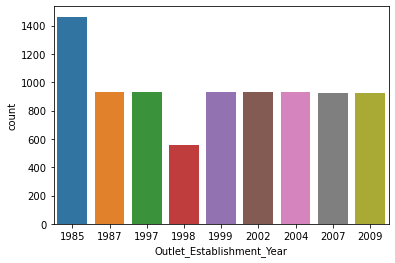

In [12]:
sns.countplot("Outlet_Establishment_Year", data=data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

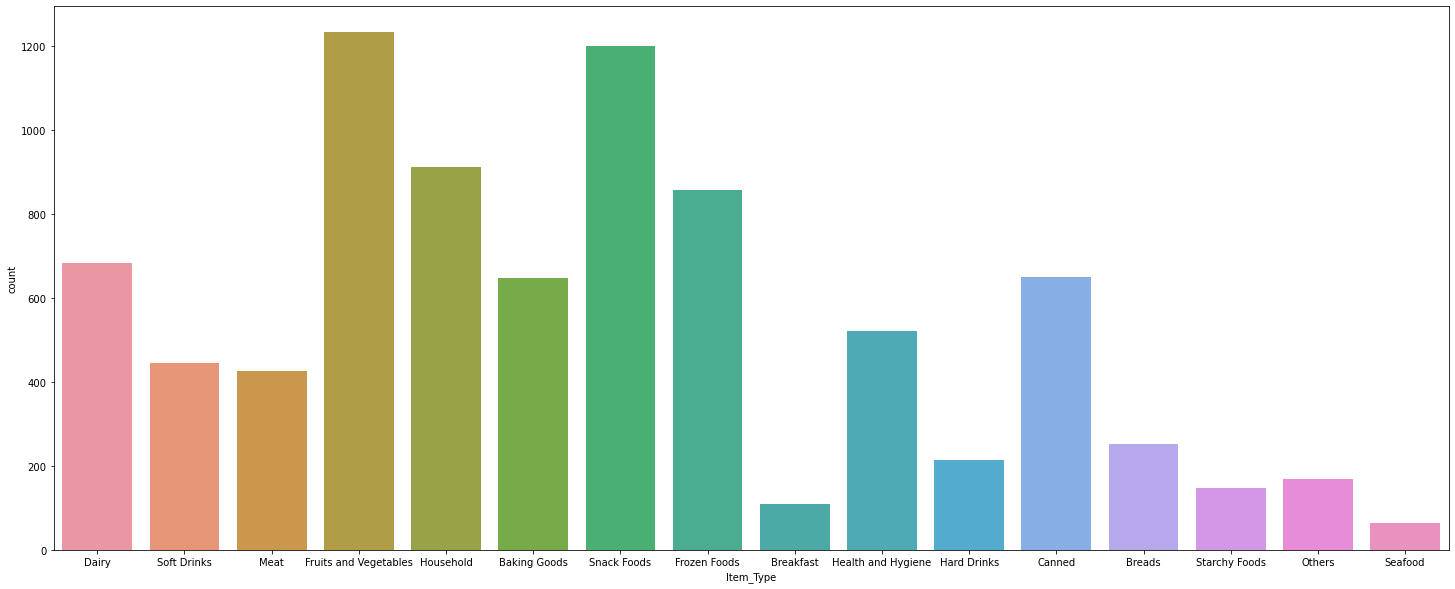

In [13]:
plt.figure(figsize=(25,10))
sns.countplot("Item_Type", data=data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

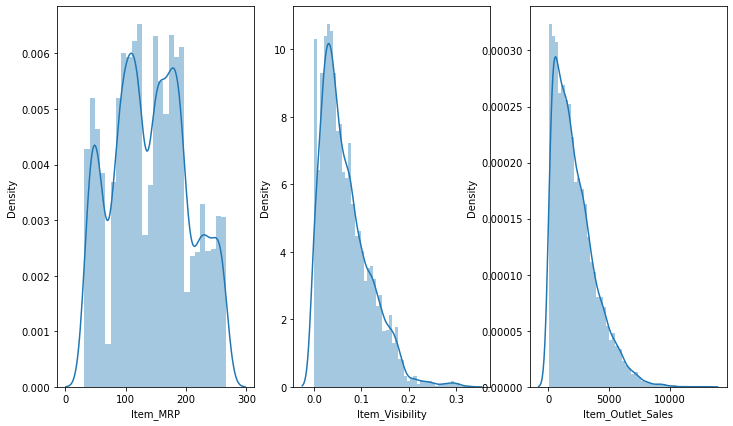

In [14]:
fig, axes = plt.subplots(1,3, figsize=(12, 7))
sns.distplot(data["Item_MRP"], ax=axes[0])
sns.distplot(data["Item_Visibility"], ax=axes[1])
sns.distplot(data["Item_Outlet_Sales"], ax=axes[2])

# Data Preprocessing

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [16]:
data

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


In [17]:
cat_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
'Outlet_Establishment_Year', 'Outlet_Location_Type','Outlet_Type']
X = pd.get_dummies(data, columns=cat_features, drop_first=True)

In [18]:
X

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.016047,249.8092,3735.1380,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0.019278,48.2692,443.4228,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,0.016760,141.6180,2097.2700,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0.000000,182.0950,732.3800,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.000000,53.8614,994.7052,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.056783,214.5218,2778.3834,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,0.046982,108.1570,549.2850,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
8520,0.035186,85.1224,1193.1136,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
8521,0.145221,103.1332,1845.5976,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [19]:
sc = MinMaxScaler()
a = sc.fit_transform(data[['Item_Visibility']])
b = sc.fit_transform(data[['Item_MRP']])
X['Item_Visibility'] = a
X['Item_MRP'] = b
X

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.048866,0.927507,3735.1380,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0.058705,0.072068,443.4228,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,0.051037,0.468288,2097.2700,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0.000000,0.640093,732.3800,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.000000,0.095805,994.7052,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.172914,0.777729,2778.3834,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,0.143069,0.326263,549.2850,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
8520,0.107148,0.228492,1193.1136,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
8521,0.442219,0.304939,1845.5976,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [20]:
from sklearn.model_selection import train_test_split
y = X['Item_Outlet_Sales']
X = X.drop(['Item_Outlet_Sales'], axis=1)


In [22]:
print(y)


0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [24]:
X

,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.048866,0.927507,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0.058705,0.072068,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,0.051037,0.468288,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0.000000,0.640093,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.000000,0.095805,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.172914,0.777729,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,0.143069,0.326263,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
8520,0.107148,0.228492,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
8521,0.442219,0.304939,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 40) (6818, 40) (1705, 40)


# XG Boost

In [36]:
from xgboost import XGBRegressor
from sklearn import metrics


In [37]:
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [42]:
y_pred = regressor.predict(X_train)
r2_train = metrics.r2_score(y_train, y_pred)
print('R Squared value = ', r2_train)

R Squared value =  0.8466328451451848


In [43]:
y_pred = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, y_pred)
print('R Squared value = ', r2_test)

R Squared value =  0.5401365534654348


# Gradient Boosting regression

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01
    
}
reg = GradientBoostingRegressor(**params)

In [47]:
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [49]:
mse = metrics.mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 1291699.2579


In [50]:
y_pred = reg.predict(X_test)
r2_test = metrics.r2_score(Y_test, y_pred)
print('R Squared value = ', r2_test)

R Squared value =  0.5815782321171734
